##Encoder Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Importing dataset from Drive

In [2]:
!unzip '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Dataset/img_celeba.zip'

Streaming output truncated to the last 5000 lines.
  inflating: img_celeba/197600.jpg   
  inflating: img_celeba/197601.jpg   
  inflating: img_celeba/197602.jpg   
  inflating: img_celeba/197603.jpg   
  inflating: img_celeba/197604.jpg   
  inflating: img_celeba/197605.jpg   
  inflating: img_celeba/197606.jpg   
  inflating: img_celeba/197607.jpg   
  inflating: img_celeba/197608.jpg   
  inflating: img_celeba/197609.jpg   
  inflating: img_celeba/197610.jpg   
  inflating: img_celeba/197611.jpg   
  inflating: img_celeba/197612.jpg   
  inflating: img_celeba/197613.jpg   
  inflating: img_celeba/197614.jpg   
  inflating: img_celeba/197615.jpg   
  inflating: img_celeba/197616.jpg   
  inflating: img_celeba/197617.jpg   
  inflating: img_celeba/197618.jpg   
  inflating: img_celeba/197619.jpg   
  inflating: img_celeba/197620.jpg   
  inflating: img_celeba/197621.jpg   
  inflating: img_celeba/197622.jpg   
  inflating: img_celeba/197623.jpg   
  inflating: img_celeba/197624.jpg   

In [3]:
!unzip '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Dataset/img_celeba.zip' > /dev/null

replace img_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


###Importing Required Packages and Libraries

In [4]:
import numpy as np 
from glob import glob
import random
from PIL import Image 
import os 
import matplotlib.pyplot as plt 

In [5]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
print(tf.__version__)

2.4.1



##Class Definition of DeepConv Encoder as presented in paper "Photoshop 2.0:Generative Adversarial Networks for Photo Editing".

###Model of DeepConv Encoder as discussed in the original paper is given bellow

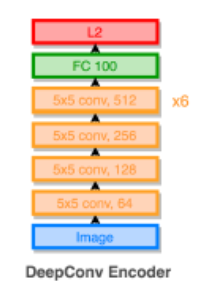

In [7]:
class Encoder:
    
    def __init__(self, lr_rate_en, input_shape, z_dim, no_of_im, beta1=0.5, alpha=0.2):

        # Initialising the variables (Learning Rate, Input Shape of Image, Latent Space dimension of z-vector, Number of Images)
        self.lr_rate_en = tf.Variable(lr_rate_en, trainable=False, name="Encoder_lr")
        self.input_shape = input_shape
        self.z_dim = z_dim
        self.im_num = no_of_im

        # Intialising placeholder for input of Encoder
        self.input_images = tf.placeholder(dtype=tf.float32, shape=(None, input_shape[0], input_shape[1], input_shape[2]), name="input_encoder")

        # Calling the model_loss function
        self.en_loss, self.en_gen_img, self.en_logits = self.model_loss(self.input_images, self.z_dim, self.input_shape[2], self.im_num)

        # Calling the model_opti function
        self.en_opt = self.model_opti(self.en_loss, self.lr_rate_en, beta1)
        
    
    """
    Encoder: Function defining the Model of Encoder
    """ 

    def encoder(self, images, alpha=0.2, reuse=False):

        # Intialising the weights with mean = 0 and stddev = 0.02
        w_init = tf.random_normal_initializer(mean=0.0, stddev = 0.02)

        with tf.variable_scope("encoder", reuse=reuse):
            
           # Defining the first CONV layer : Number of Filters = 64, Kernel = 5x5, Stride = 2
           conv1 = tf.layers.conv2d(images, 64, 5, 2, padding='SAME', kernel_initializer=w_init)
           # Defining a Leaky ReLu layer as specified in Original Paper
           lrelu1 = tf.nn.leaky_relu(conv1, alpha=alpha)
           
           # Defining the second CONV layer : Number of Filters = 128, Kernel = 5x5, Stride = 2
           conv2 = tf.layers.conv2d(lrelu1, 128, 5, 2, padding='SAME',  kernel_initializer=w_init)
           bn_norm1 = tf.layers.batch_normalization(conv2, training=True)
           lrelu2 = tf.nn.leaky_relu(bn_norm1, alpha=alpha)
           
           # Defining the third CONV layer : Number of Filters = 256, Kernel = 5x5, Stride = 2
           conv3 = tf.layers.conv2d(lrelu2, 256, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm2 = tf.layers.batch_normalization(conv3, training=True)
           lrelu3 = tf.nn.leaky_relu(bn_norm2, alpha=alpha)
           
           # Defining the Six blocks of CONV layer : Number of Filters = 512, Kernel = 5x5, Stride = 2
           # First block
           conv4 = tf.layers.conv2d(lrelu3, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm3 = tf.layers.batch_normalization(conv4, training=True)
           lrelu4 = tf.nn.leaky_relu(bn_norm3, alpha=alpha)
           
           # Second block
           conv5 = tf.layers.conv2d(lrelu4, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm4 = tf.layers.batch_normalization(conv5, training=True)
           lrelu5 = tf.nn.leaky_relu(bn_norm4, alpha=alpha)
           
           # Third block
           conv6 = tf.layers.conv2d(lrelu5, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm5 = tf.layers.batch_normalization(conv6, training=True)
           lrelu6 = tf.nn.leaky_relu(bn_norm5, alpha=alpha)
           
           # Fourth block
           conv7 = tf.layers.conv2d(lrelu6, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm6 = tf.layers.batch_normalization(conv7, training=True)
           lrelu7 = tf.nn.leaky_relu(bn_norm6, alpha=alpha)
           
           # Five block
           conv8 = tf.layers.conv2d(lrelu7, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm7 = tf.layers.batch_normalization(conv8, training=True)
           lrelu8 = tf.nn.leaky_relu(bn_norm7, alpha=alpha)
           
           # Sixth block
           conv9 = tf.layers.conv2d(lrelu8, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           
           flat = tf.reshape(conv9, (-1,512))
           
           # Applying a Dense layer of 100 nodes
           # here we are choosing 100 nodes for the dense layer because our z-vector dimension is 100 and 
           # output of Encoder will be fed as input to Generator
           logits = tf.layers.dense(flat, 100, kernel_initializer=w_init)
           
           return logits


    
    """
    Generator. Same as the generator of DCGAN. 
    """

    def generator(self, z, out_channel_dim, is_train=True):

        # Intialising the weights with mean = 0 and stddev = 0.02
        w_init = tf.random_normal_initializer(mean=0.0, stddev = 0.02)

        with tf.variable_scope('generator', reuse = False if is_train==True else True):
            
            # Defining the shape of z-vector (1x1x100)
            x1 = tf.reshape(z, (-1,1,1,100))
            
            # Adding the first Deconv layer 
            # 512 filters of 4x4 (kernel = 4) with stride = 1
            deconv1 = tf.layers.conv2d_transpose(x1, 512, 4, 1, padding='VALID', kernel_initializer=w_init)
            # Applying the Spatial Batch Normalisation layer
            bn_norm1 = tf.layers.batch_normalization(deconv1, training=is_train)
            # Applying the ReLu function
            relu1 = tf.nn.relu(bn_norm1)
            
            # Adding the second Deconv layer 
            # 256 filters of 4x4 (kernel = 4) with stride = 2
            deconv2 = tf.layers.conv2d_transpose(relu1, 256, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm2 = tf.layers.batch_normalization(deconv2, training=is_train)
            relu2 = tf.nn.relu(bn_norm2)
            
            # Adding the third Deconv layer 
            # 128 filters of 4x4 (kernel = 4) with stride = 2
            deconv3 = tf.layers.conv2d_transpose(relu2, 128, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm3 = tf.layers.batch_normalization(deconv3, training=is_train)
            relu3 = tf.nn.relu(bn_norm3)
            
            # Adding the fourth Deconv layer 
            # 64 filters of 4x4 (kernel = 4) with stride = 2
            deconv4 = tf.layers.conv2d_transpose(relu3, 64, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm4 = tf.layers.batch_normalization(deconv4, training=is_train)
            relu4 = tf.nn.relu(bn_norm4)
            
            # Adding the fifth Deconv layer 
            # output dimension filters of 4x4 (kernel = 4) with stride = 2
            deconv5 = tf.layers.conv2d_transpose(relu4, out_channel_dim, 4, 2, padding='SAME', kernel_initializer=w_init)
            
            logits = deconv5
            out = tf.tanh(deconv5, name="generator_out")
            
            return out, logits  


    
    """
    Function to calculate loss for the encoder. Calculates L2 Loss between generated images and input images.
    Returns the loss, generated image and the input image encoding. 
    """

    def model_loss(self, input_images, z_dim, out_channel_dim, im_num):

        # Calling Encoder fucntion
        en_logits = self.encoder(input_images)

        # Calling the Generator function
        # out_channel_dim = image_shape[2] means the numbers of pixels because the Image that generator produces should have pixel number equal to image shape
        gen_images,_ = self.generator(en_logits, out_channel_dim)

        gen_images = tf.reshape(gen_images, shape=(im_num, 64, 64, 3))  
        
        # Calculating loss of Encoder
        # Here we are calculating L2 loss between input_image and gen_image
        en_loss = tf.reduce_mean(tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(tf.squared_difference(input_images, gen_images), axis=3), axis=2), axis=1))

        return en_loss, gen_images, en_logits
    

    
    """
    Train the encoder using Adam Optimizer.
    """

    def model_opti(self, en_loss, lr_rate, beta1):
        
        train_vars = tf.trainable_variables()
        # Separating the Variables of Encoder
        en_vars = [var for var in train_vars if var.name.startswith('encoder')]
        
        # Optimize the parameters of encoder such that it reduces the encoder loss
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            en_train_opt = tf.train.AdamOptimizer(lr_rate, beta1=beta1).minimize(en_loss, var_list = en_vars)
        
        # returning the optimized parameters
        return en_train_opt

In [8]:
"""
Function to plot an image passed as an numpy array.
"""

def plot_it(img, title):

    if np.array_equal(img.max(),img.min()) == False:
        img = (((img - img.min())*255)/(img.max()-img.min())).astype(np.uint8)
    else:
        img = ((img - img.min())*255).astype(np.uint8)
        
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [9]:
"""
Function to get image from path and rescale it to [-1,1]
"""

def get_image_new(image_path, width, height):

    image = Image.open(image_path) 

    # crop image to reduce clutter 
    image = image.crop([30,40,168,178])

    # Resizing image to smaller size 
    # Image.BILINEAR is for 2x2 linear interpolation
    image = image.resize([width,height], Image.BILINEAR)

    # Normalisation steps
    image = np.array(image, dtype=np.float32)
    image = np.divide(image, 255)
    image = np.subtract(image, 0.5)

    #scaling image to [-1,1]
    image = np.multiply(image, 2)   

    return image

In [10]:
"""
Function to get attribute encodings saved in a .txt file. 
"""

def get_attr_encoding(file_path_attr, file_path_encoding):

    # reading the attributes encodings from .txt file
    with open(file_path_encoding,"r") as f:
        enc = f.readlines()

    # reading the attributes names from .txt file
    with open(file_path_attr,"r") as f:
        attr = f.readlines()
    
    encoding = []

    for i in range(len(enc)):
        # separating all the 100 embeddings
        embed = enc[i].split(' ')
        encoding.append(np.array(embed[0:100]))

    encoding = np.array(encoding).astype(np.float32)

    # storing the names of attributes
    #attr = np.array(label[1].split(' ')[0:40])

    return encoding, attr

In [20]:
def test(encoder, encoder_dir, encoding, attr, data_files):

    saver = tf.train.Saver()

    with tf.Session() as sess:
      # restoring the trained encoder
      sess.run(tf.global_variables_initializer())  
      saver.restore(sess, encoder_dir)

      # extracting 64 images from datafiles
      img = np.array([get_image_new(sample_file, 64, 64) for sample_file in data_files[0:64]]).astype(np.float32) 

      # calling the Encoder 
      # it will given the images generated by the Generator and z-vectors produced by the Encoder
      gen_en, log_en = sess.run([encoder.en_gen_img, encoder.en_logits],feed_dict={encoder.input_images:img})
      
      # Take encoding of first image 
      log = log_en[55]
      
      # plotting original Image
      plot_it(img[55], "Real Image")

      # plotting the generator generated image
      plot_it(gen_en[55], "Fake Image")
      
      # Manipulate the image encoding with attribute encodings to obtain different images. 
      for i in range(len(attr)):

          # adding the latent space vector of attribute to the z-vector
          z_new = log + encoding[i]
          # generate Image from this new z-vector
          gen_img,_ = sess.run(encoder.generator(z_new, 3, False))
          gen_img = np.reshape(gen_img, (64, 64, 3))

          # plotting this edited image
          plot_it(gen_img, attr[i])

In [12]:
data_path = '/content/img_celeba/' 
input_fname_pattern = "*.jpg"
encoder_dir = '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Encoder_saved_model/try_epoch_24/' 
attribute_file = '/content/drive/MyDrive/Colab Notebooks/GAN/Face Editing/Dataset/attribute_names.txt'
attr_encoding_file = '/content/drive/MyDrive/Colab Notebooks/GAN/Face Editing/Dataset/attributes_encodings.txt'

In [13]:
batch_size = 64
z_dim = 100
lr_rate = 0.0002
beta1 = 0.5
alpha = 0.2
shape = 64,64,3

tf.reset_default_graph()

# CelebA Face Database 
data_files = glob(data_path+input_fname_pattern)

# getting the names of attributes and corresponding encodings
encoding, attr = get_attr_encoding(attribute_file, attr_encoding_file)

In [14]:
en_net = Encoder(lr_rate, shape, z_dim, batch_size, beta1, alpha)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:308: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  '`tf.layers.batch_normalizat

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Encoder_saved_model/try_epoch_24/


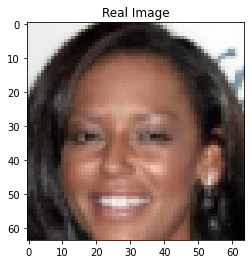

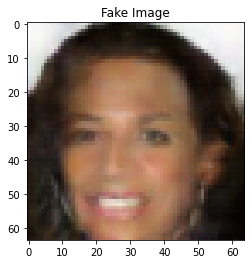

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:1294: UserWarning: `tf.layers.conv2d_transpose` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2DTranspose` instead.
  warnings.warn('`tf.layers.conv2d_transpose` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:308: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).


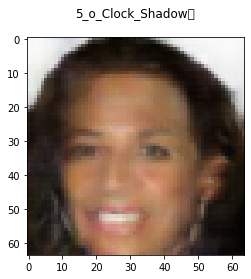

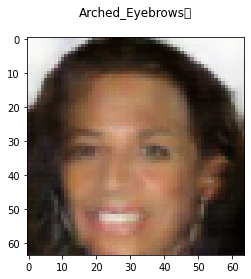

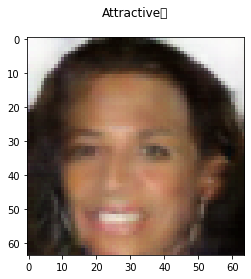

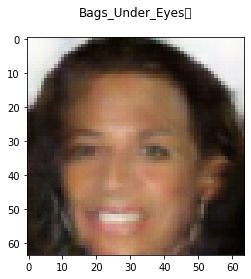

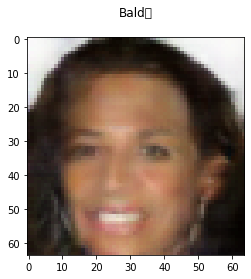

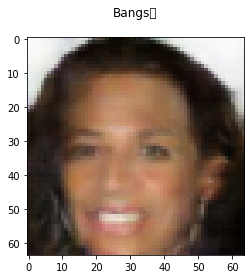

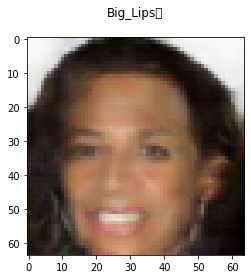

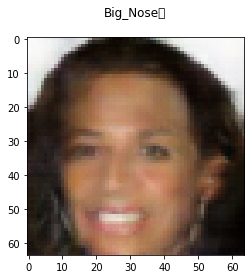

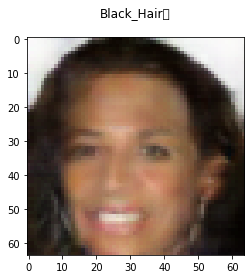

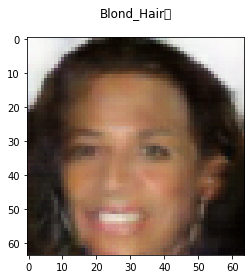

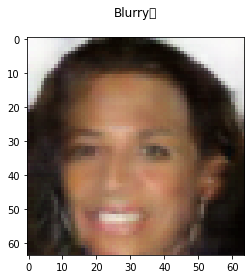

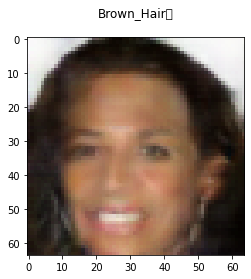

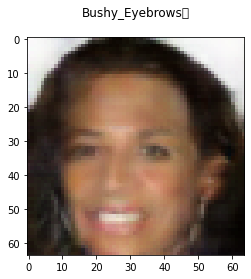

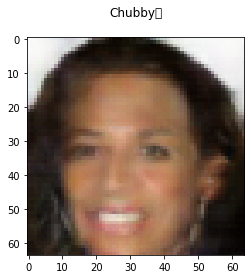

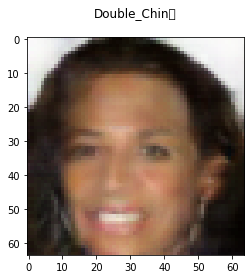

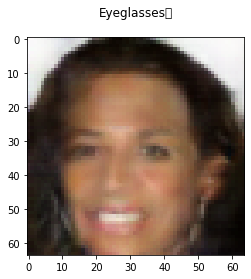

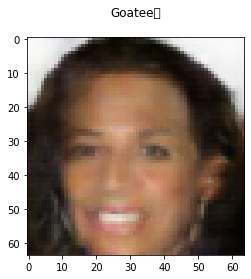

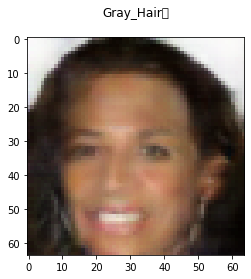

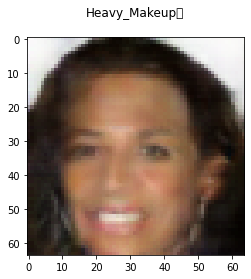

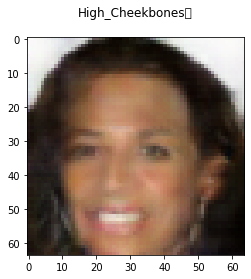

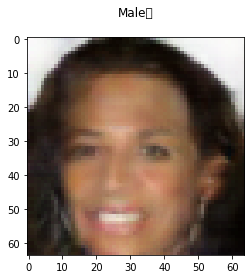

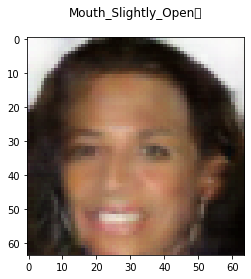

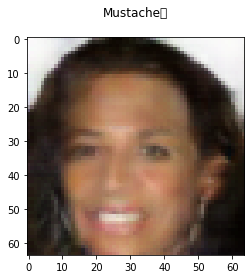

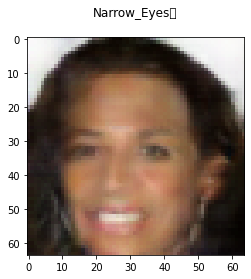

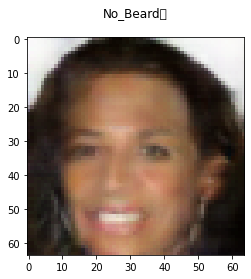

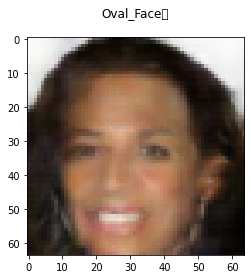

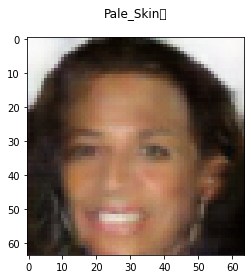

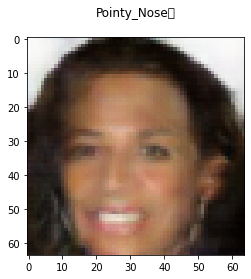

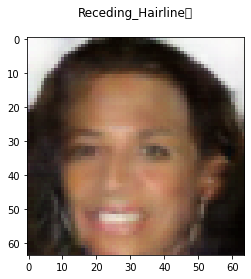

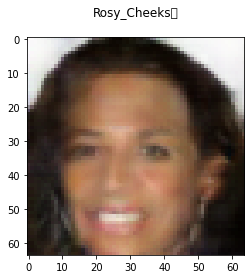

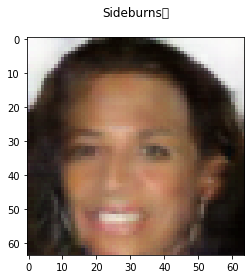

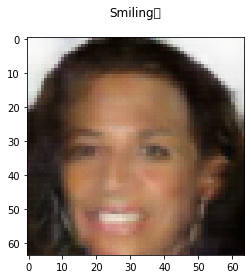

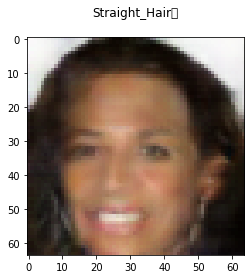

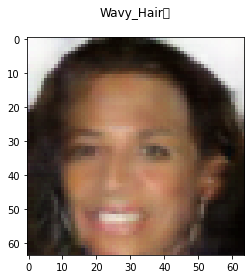

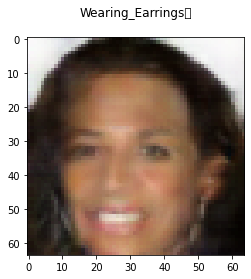

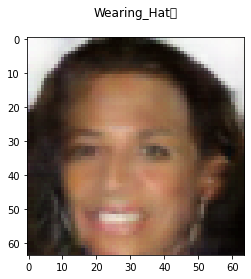

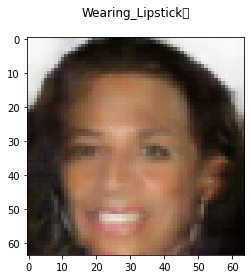

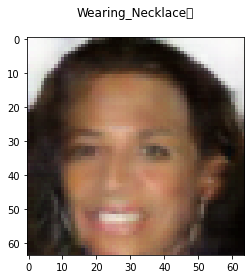

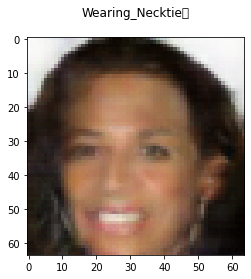

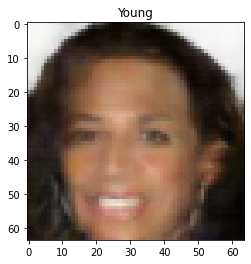

In [21]:
test(en_net, encoder_dir, encoding, attr, data_files)

In [ ]:
attr

['5_o_Clock_Shadow\t\n',
 'Arched_Eyebrows\t\n',
 'Attractive\t\n',
 'Bags_Under_Eyes\t\n',
 'Bald\t\n',
 'Bangs\t\n',
 'Big_Lips\t\n',
 'Big_Nose\t\n',
 'Black_Hair\t\n',
 'Blond_Hair\t\n',
 'Blurry\t\n',
 'Brown_Hair\t\n',
 'Bushy_Eyebrows\t\n',
 'Chubby\t\n',
 'Double_Chin\t\n',
 'Eyeglasses\t\n',
 'Goatee\t\n',
 'Gray_Hair\t\n',
 'Heavy_Makeup\t\n',
 'High_Cheekbones\t\n',
 'Male\t\n',
 'Mouth_Slightly_Open\t\n',
 'Mustache\t\n',
 'Narrow_Eyes\t\n',
 'No_Beard\t\n',
 'Oval_Face\t\n',
 'Pale_Skin\t\n',
 'Pointy_Nose\t\n',
 'Receding_Hairline\t\n',
 'Rosy_Cheeks\t\n',
 'Sideburns\t\n',
 'Smiling\t\n',
 'Straight_Hair\t\n',
 'Wavy_Hair\t\n',
 'Wearing_Earrings\t\n',
 'Wearing_Hat\t\n',
 'Wearing_Lipstick\t\n',
 'Wearing_Necklace\t\n',
 'Wearing_Necktie\t\n',
 'Young']